In [ ]:
import os
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter('ignore')
import numpy as np
from dateutil.parser import parse

import matplotlib.pyplot as plt
from skimage.morphology import remove_small_objects, remove_small_holes, \
    disk, erosion, opening, dilation
from skimage import segmentation
from skimage.filters import threshold_otsu

from utils.geotiff_utils import readGeotiff, writeGeotiff
from utils.name_utils import  medianFilePath, dateStamp
from utils.print_utils import printProgress, printSuccess, printLine, printError
from twl.twl_name_utils import recoveryTWLFilePath
from twl.twl_params import tideGaugeMetaData
from twl.twl_utils import rawTWLArray, prepTWLArray, postprocessTWLArray
from global_params import REGION

datumShift = tideGaugeMetaData[1]
def plotComparison(original, filtered, original_name, filter_name, median_np):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(40, 100), sharex=True,
                                   sharey=True)
    ax1.imshow(median_np, cmap=plt.cm.gray, alpha=1.0)
    ax1.imshow(original, cmap='jet')
    ax1.set_title(original_name)
    ax1.axis('off')
    ax2.imshow(median_np, cmap=plt.cm.gray, alpha=1.0)
    ax2.imshow(filtered, cmap='jet')
    ax2.set_title(filter_name)
    ax2.axis('off')

dateRange = [
             ['2016-03-01', '2016-10-31'],
#                 ['2017-03-01', '2017-10-31'],
#                 ['2018-03-01', '2018-10-31'],
#                 ['2019-03-01', '2019-10-31'],
#                 ['2020-03-01', '2020-10-31'],
#                  ['2021-03-01', '2021-10-31'],
            ]
date_range = [parse(dateRange[0][0]).date(), parse(dateRange[0][1]).date()]
print(f'processing {REGION}: {dateStamp(date_range).replace("_", " to ")}')

median_file_path = medianFilePath(date_range)
if not os.path.exists(median_file_path):
    printError(f'median file not found: {median_file_path}')
else:
    printProgress(f'median file: {median_file_path}')
    
median_np, geometry = readGeotiff(median_file_path)
median_np = median_np[0,:,:]

results_path = 'd:\\data\\uk\\' + region + '\\release'
writeGeotiffs = False

smallObjectSize = 1000

In [ ]:
otsu_np = median_np.copy()
otsu_np[np.isnan(otsu_np)] = 0
otsu_threshold = threshold_otsu(otsu_np)*1.1
small_object_size = 100000
mask1_np = np.where(median_np > otsu_threshold, 1, 0)
mask1_np = remove_small_holes(remove_small_objects(
                          mask1_np,
                          1000), 1000)
plt.figure(figsize=(10,10))
ax = plt.gca()
ax.imshow(mask1_np, cmap=plt.cm.gray)

if writeGeotiffs:
    file_path = os.path.join(results_path,
                              REGION + '_mask.tif')
    print(file_path)
    writeGeotiff(mask1_np, file_path, geometry)

In [ ]:
mask1_np = remove_small_holes(remove_small_objects(
                          mask1_np,
                          small_object_size), small_object_size)

footprint = disk(20)
eroded = erosion(mask1_np, disk(10))

eroded = remove_small_holes(remove_small_objects(eroded, small_object_size),
                          small_object_size)

plt.figure(figsize=(10,10))
ax = plt.gca()
ax.imshow(eroded, cmap=plt.cm.gray)

#np.save(os.path.join(results_path, 'mask_1.npy'), eroded)
if writeGeotiffs:
    file_path = os.path.join(results_path,
                              REGION + '_mask_3.tif')
    print(file_path)
    writeGeotiff(eroded, file_path, geometry)

In [ ]:
otsu_np = median_np.copy()
otsu_np[np.isnan(otsu_np)] = 0
otsu_threshold = threshold_otsu(otsu_np)*1.1
small_object_size = 10000
mask2_np = np.where(median_np > otsu_threshold, 1, 0)

mask2_np = remove_small_holes(remove_small_objects(
                          mask2_np,
                          small_object_size), small_object_size)

mask2_np[mask1_np == 0] = np.NaN

plt.figure(figsize=(10,10))
ax = plt.gca()
ax.imshow(mask2_np, cmap=plt.cm.gray)

#np.save(os.path.join(results_path, 'mask_2.npy'), mask2_np)
if writeGeotiffs:
    writeGeotiff(mask2_np, os.path.join(results_path,
                              REGION + '_mask_2.tif'), geometry)

In [ ]:
## Portsmouth
dateRange = ['2015-10-01', '2016-06-20']
dateRange = ['2018-02-01', '2018-07-31']
dateRange = ['2020-07-17', '2020-10-21']

## Pagham
dateRange = ['2020-05-01', '2020-09-30']
dateRange = ['2020-07-15', '2020-12-16']
dateRange = ['2020-07-01', '2020-11-30']
dateRange = ['2020-07-01', '2020-10-31']

date_range = [parse(dateRange[0]).date(), parse(dateRange[1]).date()]

date_stamp = dateRange[0][:4]+dateRange[0][5:7]+ dateRange[0][8:10]+'_'+\
             dateRange[1][:4]+dateRange[1][5:7]+ dateRange[1][8:10]

twl_orig_np = np.load(recoveryTWLFilePath(date_range, 'total'))
height_orig_np = twl_orig_np[0,:]
corr_np = twl_np[1,:]

if True:
    height_orig_np = np.where(mask_np==1, height_orig_np, np.NaN)

printLine(2)
printProgress('')

printProgress(f'2018 orig:\t{np.nanmin(height_orig_np):.0f}' +\
              f'\t{np.nanmax(height_orig_np):.0f}\t{np.nanmean(height_orig_np):.1f}')

printProgress('')
printLine(2)

if writeGeotiffs:
    writeGeotiff(rawTWLArray(height_orig_np, corr_np),
                 os.path.join(results_path,
                              'TWL_2018_raw.tif'), geometry)

In [ ]:
plt.figure(figsize=(10,10))
ax = plt.gca()
ax.imshow(median_np, cmap=plt.cm.gray, alpha=1.0)
ax.imshow(twl_orig_np, cmap='jet')

In [ ]:
twl_ar = height_orig_np[~np.isnan(height_orig_np)]

# matplotlib histogram
plt.hist(twl_ar,
         color = 'blue',
         edgecolor = 'black',
         bins = 50)

plt.title('Histogram of TWL elevations')
plt.xlabel('heights (mm)')
plt.ylabel('pixels')

In [ ]:
twl_prep_np = prepTWLArray(twl_orig_np, corr_np,
                           corr_threshold=0.5,
                           low_high_cut=[500, 1800])

printLine(2)
printProgress('')

printProgress(f'TWL prep:\t{np.nanmin(twl_prep_np):.0f}' + \
              f'\t{np.nanmax(twl_prep_np):.0f}\t{np.nanmean(twl_prep_np):.1f}')
printProgress('')
printLine(2)

if writeGeotiffs:
    writeGeotiff(twl_prep_np,
                 os.path.join(results_path,
                              'TWL_2018_prep.tif'), geometry)
plt.figure(figsize=(10,10))
ax = plt.gca()
ax.imshow(median_np, cmap=plt.cm.gray, alpha=1.0)
ax.imshow(twl_prep_np, cmap='jet')

In [ ]:
twl_prep_ar = twl_prep_np[~np.isnan(twl_prep_np)]
prep_count = len(twl_prep_ar)

plt.hist(twl_prep_ar,
         range=[-500,3000],
         color='blue',
         edgecolor='black',
         bins=35)

plt.suptitle('Histogram of TWL elevations')
plt.title('after prep function')
plt.xlabel('heights (mm)')
plt.ylabel('pixels')

In [ ]:
twl_post_np = postprocessTWLArray(twl_prep_np,
                                  small_object_size=1000,
                                  max_height=None,
                                  min_height=None)
if writeGeotiffs:
    writeGeotiff(twl_post_np,
                 os.path.join(results_path,
                              'TWL_2018_post.tif'), geometry)
printLine(2)
printProgress('')

printProgress(f'TWL post:\t{np.nanmin(twl_post_np):.0f}' + \
              f'\t{np.nanmax(twl_post_np):.0f}\t{np.nanmean(twl_post_np):.1f}')
printProgress('')
printLine(2)

plt.figure(figsize=(10,10))
ax = plt.gca()
ax.imshow(median_np, cmap=plt.cm.gray, alpha=1.0)
ax.imshow(twl_post_np, cmap='jet')

In [ ]:
twl_post_ar = twl_post_np[~np.isnan(twl_post_np)]
post_count = len(twl_post_ar)

plt.hist(twl_post_ar,
         range=[-500,3000],
         color='blue',
         edgecolor='black',
         bins=35)

plt.suptitle('Histogram of TWL elevations')
plt.title('after post function')
plt.xlabel('heights (mm)')
plt.ylabel('pixels')

In [ ]:
print(f'chopped: {(post_count*100/prep_count):.2f}')

In [ ]:
#%matplotlib
#plotComparison(twl_orig_np, twl_chopped_np, 'original', 'de-cluttered', median_np)

In [ ]:
#twl_np = twl_np/(np.nanmax(twl_np/255.0)).astype(np.int)
#slic = segmentation.slic(twl_np, n_segments=25, start_label=1)

In [ ]:
#plt.figure(figsize=(10,10))
#ax = plt.gca()
#ax.imshow(median_np, cmap=plt.cm.gray, alpha=1.0)
#ax.imshow(twl_np, cmap='jet')
#ax.imshow(segmentation.mark_boundaries(twl_np, slic))
#ax.contour(mask, colors='fuchsia', linewidths=1)

C:\Users\cneil\Anaconda3\envs\coastsatnoc\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
C:\Users\cneil\Anaconda3\envs\coastsatnoc\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?


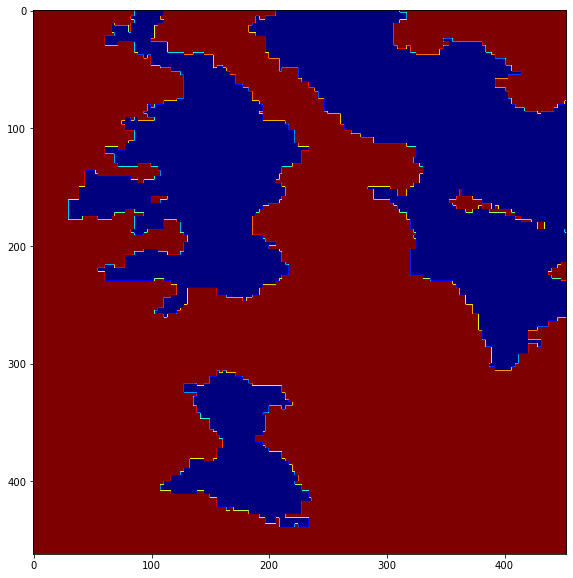

In [36]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import remove_small_objects, remove_small_holes, \
    disk, erosion, opening, dilation
from gee_connection.preprocess import readGeotiff, writeGeotiff


SMALL_OBJECT_SIZE = 1000
median_dir_path = 'D:\\data\\resow\\Scilly\\median'

hansen_file_path = os.path.join(median_dir_path, 'hansen2015.tif')
seamask_file_path = os.path.join(median_dir_path, 'sea_mask.tif')

hansen_np, geometry = readGeotiff(hansen_file_path)
hansen_np = np.squeeze(hansen_np)

water_mask_np = np.where(hansen_np == 1, 0, 1)

water_mask_np = remove_small_holes(remove_small_objects(water_mask_np, SMALL_OBJECT_SIZE),
                      SMALL_OBJECT_SIZE)

plt.figure(figsize=(10,10))
ax = plt.gca()
ax.imshow(water_mask_np, cmap='jet')

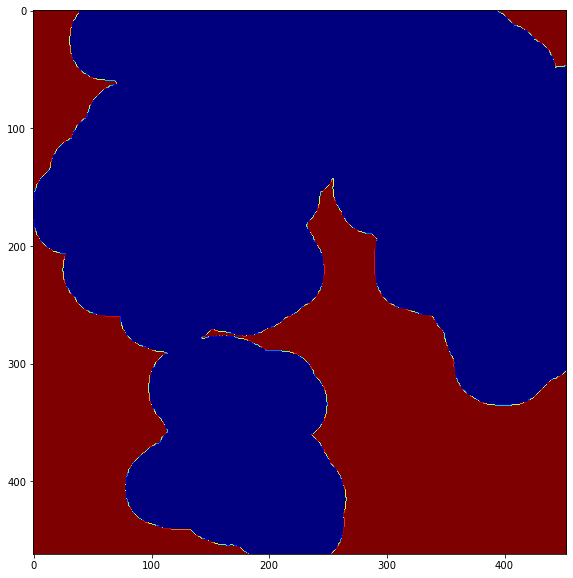

In [37]:
footprint = disk(30)
eroded = erosion(water_mask_np, footprint)

v = remove_small_holes(remove_small_objects(eroded, SMALL_OBJECT_SIZE),
                      SMALL_OBJECT_SIZE)

plt.figure(figsize=(10,10))
ax = plt.gca()
ax.imshow(v, cmap='jet')

In [30]:
writeGeotiff(eroded, seamask_file_path, geometry)